#MP Neuron Model to predict the cancer is malignant or Benign

In [7]:
X = breast_cancer.data
Y = breast_cancer.target
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [0]:
import sklearn.datasets 
import numpy as np


In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [5]:
import pandas as pd
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
data.shape

(569, 31)

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
print(data['class'].value_counts())
print(breast_cancer.target_names)

1    357
0    212
Name: class, dtype: int64
['malignant' 'benign']


In [11]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [12]:
data.groupby('class').describe()

mean radius                       ... worst fractal dimension                  
            count       mean       std  ...                     50%       75%     max
class                                   ...                                          
0           212.0  17.462830  3.203971  ...                 0.08760  0.102625  0.2075
1           357.0  12.146524  1.780512  ...                 0.07712  0.085410  0.1486

[2 rows x 240 columns]

# Train Test Split



In [0]:
from sklearn.model_selection import train_test_split

X = data.drop('class',axis=1)
Y = data['class']

In [20]:
type(X)

pandas.core.frame.DataFrame

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
print(X_train.shape, X.shape, X_test.shape)


(426, 30) (569, 30) (143, 30)


In [35]:
# here the train size and test size is fixed hence
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.1)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


In [41]:
# but now we want to test whether the benign and malignant is split into proper proprtion or not?
print(Y.mean(),Y_train.mean(),Y_test.mean()) # here if i again interpret the train_test_split function each time i get various values
# that means the splitting of data is not in fixed proprtion 
# to do that 
# we'll use


0.6274165202108963 0.626953125 0.631578947368421


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify= Y) #  now ratio will be fixed

In [154]:
# now the problem is solved as the 'class' is splitting in proper format but if we calulate the mean of all the X attribute
print(X_train.mean(), X_test.mean(), X.mean()) # look the mean radius is varying

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

In [0]:
# so to solve this issue we need to use deterministic split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify = Y, random_state =2 )

In [156]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.172566
mean texture                19.299238
mean perimeter              92.248145
mean area                  659.296680
mean smoothness              0.096276
mean compactness             0.103774
mean concavity               0.088522
mean concave points          0.048980
mean symmetry                0.181041
mean fractal dimension       0.062667
radius error                 0.407109
texture error                1.218305
perimeter error              2.882496
area error                  40.741748
smoothness error             0.007003
compactness error            0.025156
concavity error              0.031811
concave points error         0.011903
symmetry error               0.020492
fractal dimension error      0.003739
worst radius                16.339492
worst texture               25.685840
worst perimeter            107.681680
worst area                 889.280078
worst smoothness             0.132037
worst compactness            0.250718
worst concav

#Binarization of input

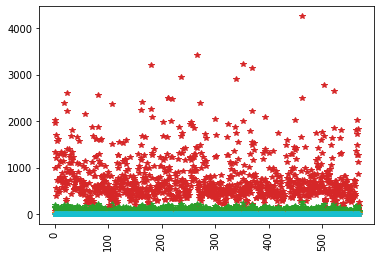

In [157]:
import matplotlib.pyplot as plt
plt.plot(X_train, '*')
plt.xticks(rotation='vertical')   # xticks to show all x axis names vertically
plt.show()

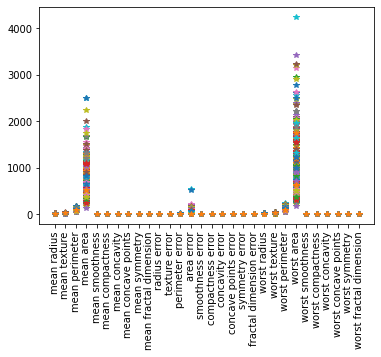

In [158]:
# first plot all the data
import matplotlib.pyplot as plt
plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')   # xticks to show all x axis names vertically
plt.show()

In [0]:
# manual way to make the data binarized.
x_binarised_3_trian = X_train['mean area'].map(lambda x : 0 if x<1000 else 1)

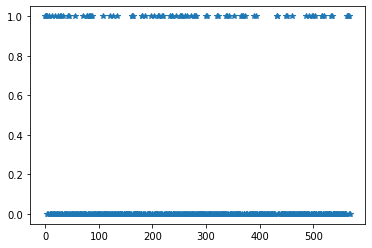

In [160]:
plt.plot(x_binarised_3_trian.T,'*')
plt.show()

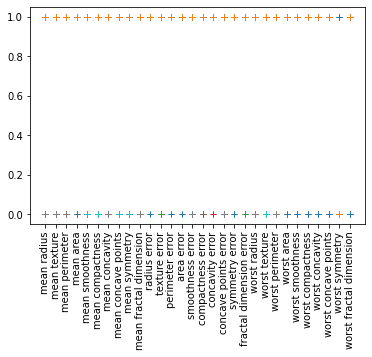

In [161]:
# using cut function to make the data binarized (X_train)
X_binarized_train = X_train.apply(pd.cut,bins = 2, labels=[1,0])
plt.plot(X_binarized_train.T,'+')
plt.xticks(rotation = 'vertical')
plt.show()

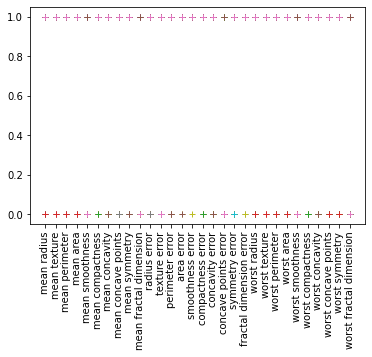

In [162]:
# using cut function to make the data binarized  (X_test)
X_binarized_test = X_test.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(X_binarized_test.T,'+')
plt.xticks(rotation = 'vertical')
plt.show()


In [0]:
#finally converting the train test data to numpy
X_binarized_train = X_binarized_train.values
X_binarized_test =  X_binarized_test.values


In [164]:
X_binarized_test.shape

(57, 30)

In [165]:
X_binarized_train.shape

(512, 30)

In [0]:
Y_binarized_train = Y_train.values

In [0]:
Y_binarized_test = Y_test.values

In [168]:
print (Y_binarized_train.shape)

(512,)


#My try of learning model



In [170]:
def evaluation(p):
  a = np.asarray(p)
  count=0
  for i  in range(Y_binarized_test.shape[0]):
    if(a[i]==Y_binarized_test[i]):
      count = count+1
  return (count/Y_binarized_test.shape[0])

def squared_error(l,ans):
  a = np. asarray(l)
  error=0
  for i in range(Y_binarized_train.shape[0]):
    error += (Y_binarized_train[i]-a[i])**2
  ans.append(error)


ans =list()
for b in range(0,31): 
  l =list()
  for i in range(512):
    temp =0
    for j in range(30):
      temp+= X_binarized_train[i][j]
    if temp >=b:
      l.append(1)
    else:
      l.append(0)
  squared_error(l,ans)
b = ans.index(min(ans))
print('The value of b is' ,b)

p = list()
for i in range(57):
  temp =0
  for j in range(30):
    temp+= X_binarized_test[i][j]
  if temp >=b:
    p.append(1)
  else:
    p.append(0)
# testing my module to the testing data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.asarray(p),Y_binarized_test)
print('Evaluation of MP Neuron  for breast cancer prediction accuracy is  :- ', accuracy*100)



The value of b is 27
Evaluation of MP Neuron  for breast cancer prediction accuracy is  :-  89.47368421052632
